# House Price Prediciton

About Dataset

Explore the fascinating world of housing price prediction with this synthetic dataset. Perfect for data science enthusiasts, machine learning practitioners, and Kaggle learners, this dataset offers a diverse collection of features, including square footage, bedrooms, bathrooms, neighborhood types, and the year of construction. Immerse yourself in the challenge of predicting house prices and enhance your skills in regression analysis.


Data Set link:https://www.kaggle.com/datasets/muhammadbinimran/housing-price-prediction-data/data

# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.api as sm

In [78]:
df=pd.read_csv("housing_price_dataset.csv")
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


# EDA

In [3]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [4]:
df.dtypes

SquareFeet        int64
Bedrooms          int64
Bathrooms         int64
Neighborhood     object
YearBuilt         int64
Price           float64
dtype: object

In [5]:
df.shape

(50000, 6)

In [6]:
df.isna().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [7]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


<Axes: xlabel='Price'>

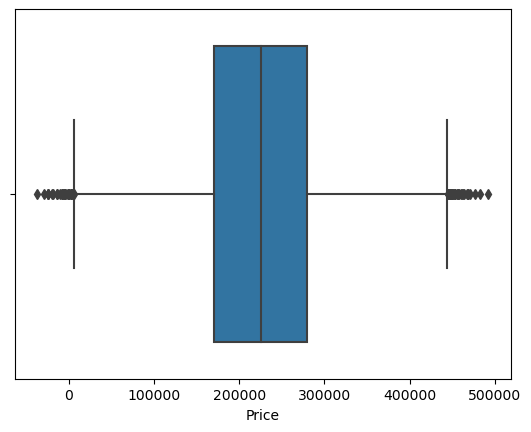

In [53]:
sns.boxplot(x="Price",data=df)

We see that it has outliers so removing outliers

<Axes: xlabel='Price'>

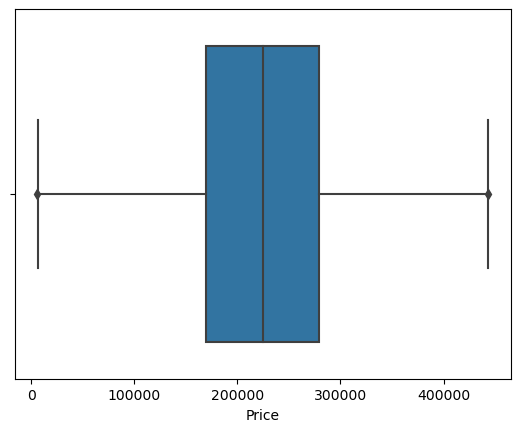

In [55]:
Q3=df["Price"].quantile(0.75)
Q1=df["Price"].quantile(0.25)
med=df["Price"].median()
IQR=Q3-Q1
upper=Q3+(1.5*IQR)
lower=Q1-(1.5*IQR)
df["Price"]=df["Price"].where(df["Price"]>lower,other=med)
df["Price"]=df["Price"].where(df["Price"]<upper,other=med)
sns.boxplot(x="Price",data=df)

So outliers Removed

# Analysis of House Price with various other features

#### squarefeet of house vs price

Text(0.5, 1.0, 'Squarefeet of house vs Price ')

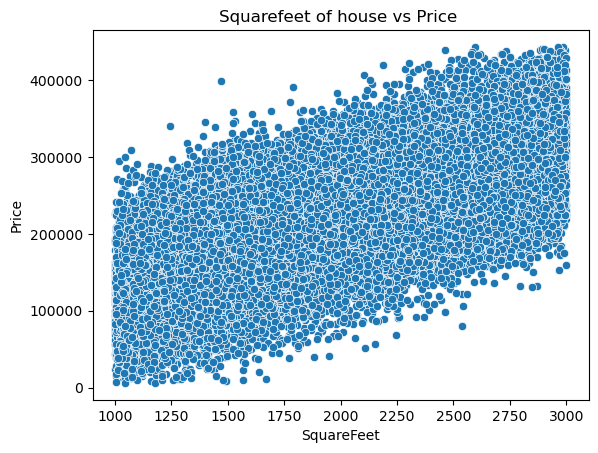

In [56]:
sns.scatterplot(x="SquareFeet",y="Price",data=df)
plt.title("Squarefeet of house vs Price ")

So we see how as we increase the Squarefeet of house the price increases as expected

#### Number of Bedrooms vs Price

In [57]:
df["Bedrooms"].value_counts()

3    12661
5    12468
2    12436
4    12435
Name: Bedrooms, dtype: int64

In [58]:
bed=pd.DataFrame(df.groupby(by="Bedrooms")["Price"].mean().reset_index(name="Average Price"))
bed

,Bedrooms,Average Price
0,2,218249.252067
1,3,221078.202916
2,4,227548.914442
3,5,232464.690840


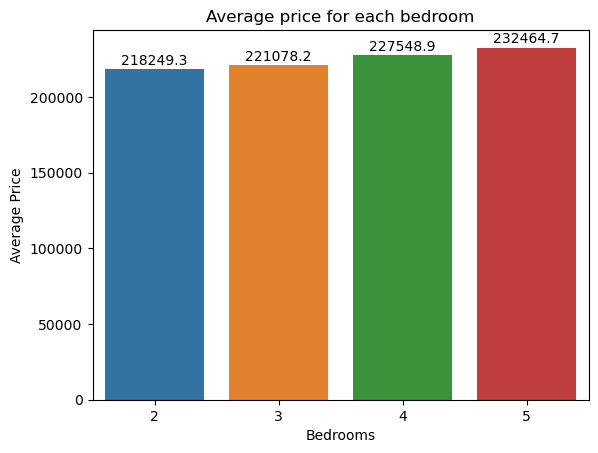

In [59]:
sns.barplot(x="Bedrooms",y="Average Price",data=bed)
plt.title("Average price for each bedroom")
for index, value in enumerate(bed["Average Price"]):
    plt.text(index, value + 1000, f"{value:.1f}", ha='center', va='bottom')

plt.show()


We can see that as number of bedrooms increase the Average price also starts to increase

#### Number of Bathrooms vs Price

In [60]:
df["Bathrooms"].value_counts()

1    16755
2    16719
3    16526
Name: Bathrooms, dtype: int64

In [61]:
bath=pd.DataFrame(df.groupby(by="Bathrooms")["Price"].mean().reset_index(name="Average Price"))
bath

,Bathrooms,Average Price
0,1,222045.094838
1,2,225249.613104
2,3,227208.368439


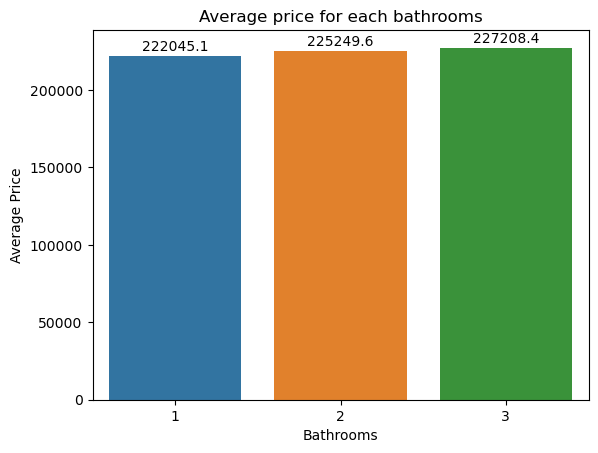

In [62]:
sns.barplot(x="Bathrooms",y="Average Price",data=bath)
plt.title("Average price for each bathrooms")
for index, value in enumerate(bath["Average Price"]):
    plt.text(index, value + 1000, f"{value:.1f}", ha='center', va='bottom')

plt.show()

We can see how as we increase the number of bathrooms the  Average Price increases

#### Neighborhood vs Average Price

In [63]:
df["Neighborhood"].value_counts()

Suburb    16721
Rural     16676
Urban     16603
Name: Neighborhood, dtype: int64

In [64]:
neighbour=pd.DataFrame(df.groupby(by="Neighborhood")["Price"].mean().reset_index(name="Average Price"))
neighbour

,Neighborhood,Average Price
0,Rural,224125.178580
1,Suburb,223192.948028
2,Urban,227166.089281


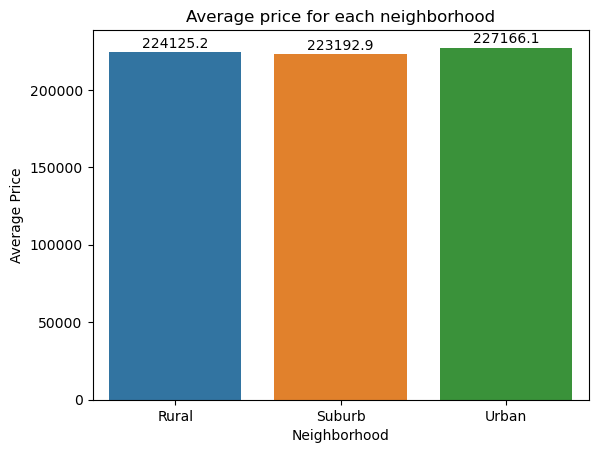

In [65]:
sns.barplot(x="Neighborhood",y="Average Price",data=neighbour)
plt.title("Average price for each neighborhood")
for index, value in enumerate(neighbour["Average Price"]):
    plt.text(index, value + 1000, f"{value:.1f}", ha='center', va='bottom')

plt.show()

We can see how the suburb and rural almost is same but Urban has slightly Higher Average prices 

#### Bathrooms and bedrooms with Avg prices

In [66]:
result = pd.crosstab(df["Bedrooms"], df["Bathrooms"], values=df["Price"], aggfunc=np.mean)
result

Bathrooms,1,2,3
Bedrooms,,,
2,215886.544085,218562.827360,220404.115749
3,219351.799315,221262.999634,222641.779733
4,224743.774128,227479.904192,230408.868379
5,228413.876000,233710.084748,235262.003348


we can see that number of bathrooms along with number of bedroom increasing proportionally increase the average Price

#### Year vs Average Price

In [67]:
year_means = df.groupby("YearBuilt")["Price"].mean().reset_index()
year_means.columns = ["Year", "Average price"]
year_means

,Year,Average price
0,1950,221824.023360
1,1951,226840.452189
2,1952,222467.013806
3,1953,224131.036288
4,1954,220090.184532
...,...,...
67,2017,218834.416354
68,2018,224177.614510
69,2019,224064.205270
70,2020,222865.659902


Text(0.5, 1.0, 'Average price for each year')

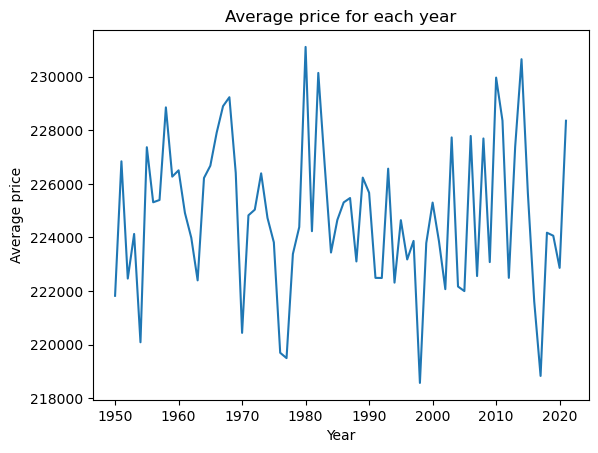

In [68]:
sns.lineplot(x="Year",y="Average price",data=year_means)
plt.title("Average price for each year")

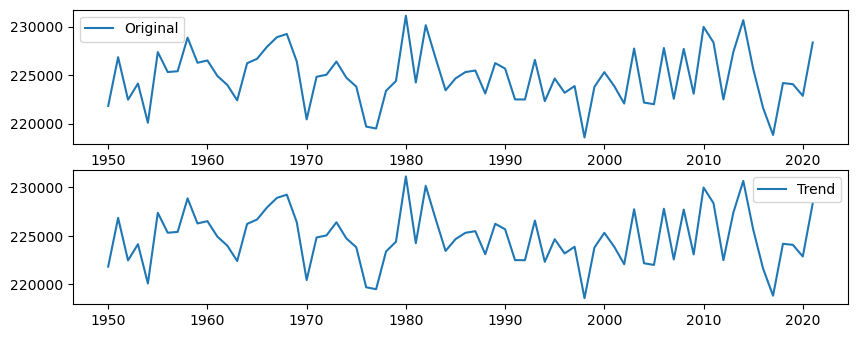

In [69]:

year_means['Year'] = pd.to_datetime(year_means['Year'], format='%Y')
year_means.set_index('Year', inplace=True) 

result = sm.tsa.seasonal_decompose(year_means['Average price'], model='additive')

plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(year_means['Average price'], label='Original')
plt.legend()

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend()



We can see how average price has been varied over years and is currently up the trend and was low for certain years before around 2019 we may assume covid was also a factor for the same

#### ALL vs price

In [79]:
df["Neighborhood"]=df["Neighborhood"].map({"Rural":1,"Suburb":2,"Urban":3})
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,1,1969,215355.283618
1,2459,3,2,1,1980,195014.221626
2,1860,2,1,2,1970,306891.012076
3,2294,2,1,3,1996,206786.787153
4,2130,5,2,2,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,1,1975,100080.865895
49996,2854,2,2,2,1988,374507.656727
49997,2979,5,3,2,1962,384110.555590
49998,2596,5,2,1,1984,380512.685957


<Axes: >

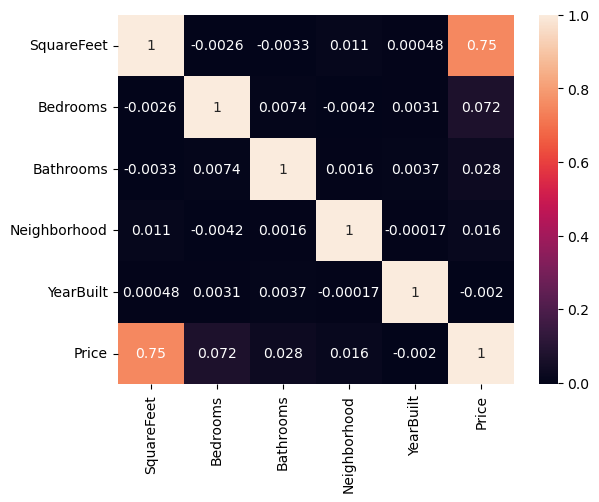

In [71]:
sns.heatmap(data=df.corr(),cbar=True,annot=True)

we see how year built is negatively correlated with price

# House Price Prediction Model

Now let’s move on to training a Machine Learning model to predict House Price. I’ll start by dividing the data into training and testing sets:

In [81]:
x=df.iloc[:,0:5]
y=df.iloc[:,5]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,
                                           test_size=0.2,
                                           random_state=4)

Now let’s train the model using the random forest Regressor  algorithm(we are prediciting the continuous value):

In [82]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x, y)

RandomForestRegressor()

Now let’s have a look at the accuracy of the model:

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
predictions = model.predict(xtest)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 15716.284350803104


# Now let’s test the model by making predictions:

In [84]:
print("House Price Prediction : ")
a = int(input("SquareFeet of the house (Thousands): "))
b = int(input("Number of Bedrooms(2,3,4,5): "))
c = int(input("Number of Bathrooms(1,2,3): "))
d = int(input("Year Built(from 1950 to 2020): "))
e = float(input("neighbourhood (Rural = 1, Suburban = 2, Urban=3) : "))

features = np.array([[a, b, c, d, e]])
print("The Price for your house may come up to(+_15716.284350803104 ) = ", model.predict(features))

House Price Prediction : 
SquareFeet of the house (Thousands): 2175
Number of Bedrooms(2,3,4,5): 3
Number of Bathrooms(1,2,3): 2
Year Built(from 1950 to 2020): 2017
neighbourhood (Rural = 1, Suburban = 2, Urban=3) : 3
The Price for your house may come up to(+_15716.284350803104 ) =  [269745.70155346]


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Summary

House Price Prediction means based on certain Features affecting the Price of the Houses we Predict what may be the Price of house,to do so we built and Trained a Model which takes features resposnible for pricing of house and predicts the price of houses